# Pytorch's Cartoon GAN

**Generative Adversarial Network for Generating `Cartoon` Faces**

## Reference
- [Dataset Link](https://www.kaggle.com/datasets/imreallyjohn/cartoonset10k)
- [Notebook Referred](https://jovian.com/aakashns/06b-anime-dcgan)

## ToDo
- [x] Notebook Preparation
- [x] Data Exploration
- [x] Data Preparation
- [ ] Model Definition
- [ ] Model Traning
- [ ] HyperTuning (if needed)
- [ ] Evaluation

### Notebook Preparation

In [79]:
# Import Libraries

import os
import cv2
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torch.utils.data import DataLoader
from torchvision.utils import save_image, make_grid
from torchvision.datasets import ImageFolder

from PIL import Image as img
from tqdm.notebook import tqdm
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [68]:
# Datafile Checking

DATA_DIR = '/kaggle/input/cartoonset10k/cartoonset10k'

imagesDir = os.listdir(DATA_DIR)

print('Sample: ', imagesDir[:5])
print('Length: ', len(imagesDir))

Sample:  ['cs11221941617409717231.png', 'cs1140172971336216492.png', 'cs10497634233692504766.png', 'cs10947981428783986823.png', 'cs10249589535790648751.png']
Length:  10000


### Data Exploration

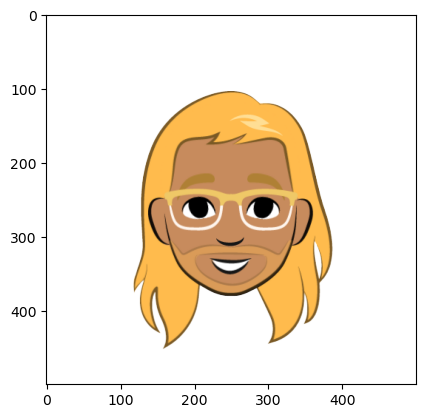

In [69]:
# Plotting Image

sampleImg = imagesDir[1]

image = mpimg.imread(f"{DATA_DIR}/{sampleImg}")
plt.imshow(image)
plt.show()

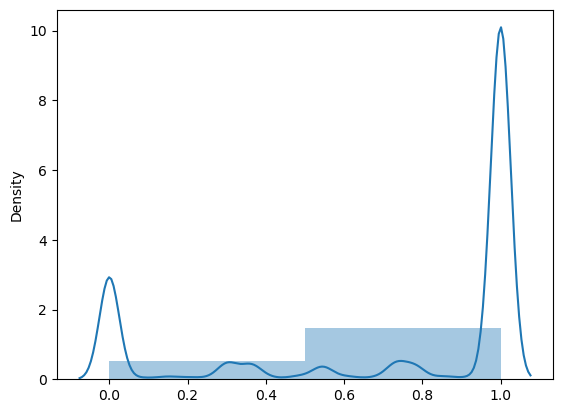

In [70]:
# Plotting Values Distribution

newImg = image.reshape(image.shape[2], (image.shape[0]*image.shape[1]))
sns.distplot(newImg, bins = 2)
plt.show()

### Data Preparation

In [73]:
# Loading Image

imageSize = 64
batchSize = 128

trainDataset = ImageFolder(
    root = '/kaggle/input/cartoonset10k/',
    transform = T.Compose([
        T.Resize(imageSize),
        T.ToTensor()
    ])
)

trainDataLoader = DataLoader(dataset = trainDataset, batch_size = batchSize, shuffle = True, num_workers = 3, pin_memory = True)

In [81]:
# Visualizing Image

def showImages(images, nmax = 64):
    fig, ax = plt.subplots(figsize = (8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images.detach()[:nmax], nrow = 8).permute(1, 2, 0))

def showBatch(dl, nmax = 64):
    for images, _ in dl:
        showImages(images, nmax)
        break

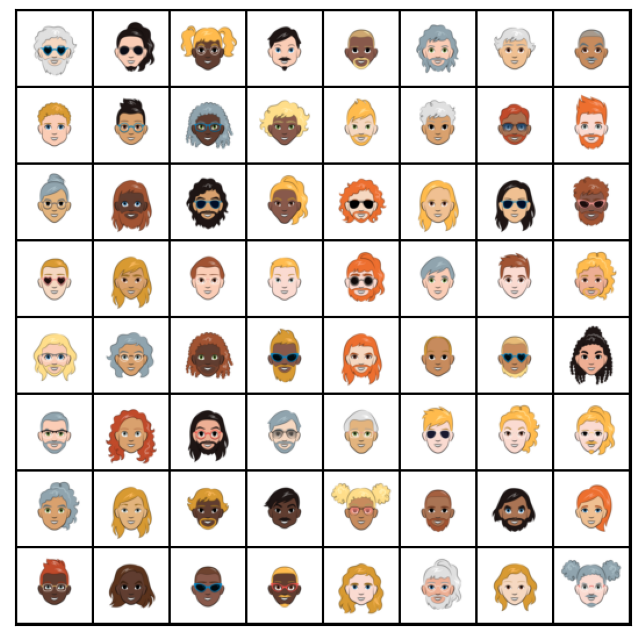

In [82]:
showBatch(trainDataLoader)

In [83]:
# Function to get Default Device

def getDefaultDevice():
    if torch.cuda.is_available():
        return torch.device('cuda')
    return torch.device('cpu')

# Function to change from cpu to gpu

def toDevice(data, device):
    if isinstance(data, (list, tuple)):
        return [toDevice(x, device) for x in data]
    return data.to(device, non_blocking = True)

# Function to change the DataLoader

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield toDevice(b, self.device)

    def __len__(self):
        return len(self.dl)

device = getDefaultDevice()
device

device(type='cuda')

In [84]:
trainDataLoader = DeviceDataLoader(trainDataLoader, device)